In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk

In [15]:
# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Load the Twitter training dataset
url = "https://raw.githubusercontent.com/koshishs/PRODIGY_DS_04/main/twitter_training.csv"
data = pd.read_csv(url)

In [17]:
# Display the first few rows of the dataset
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [19]:
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [30]:
text_column_name = 'Borderlands'  # Change 'tweet' to the correct column name containing text data
if text_column_name not in data.columns:
    raise KeyError(f"Column '{text_column_name}' not found in the dataset.")

In [31]:
# Analyze sentiment using NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data['compound'] = data[text_column_name].apply(lambda x: sia.polarity_scores(x)['compound'])

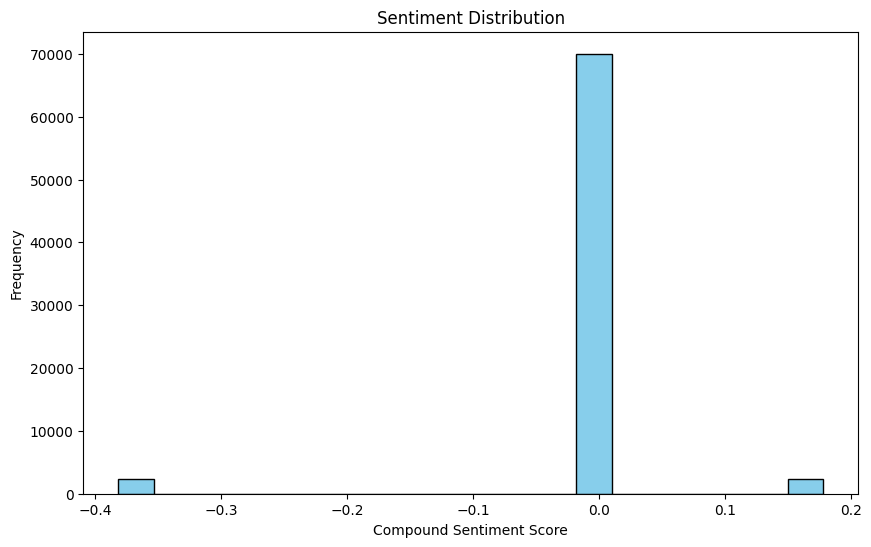

In [32]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
data['compound'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Visualize Word Cloud for positive and negative sentiments
positive_text = ' '.join(data[data['compound'] > 0][text_column_name])
negative_text = ' '.join(data[data['compound'] < 0][text_column_name])

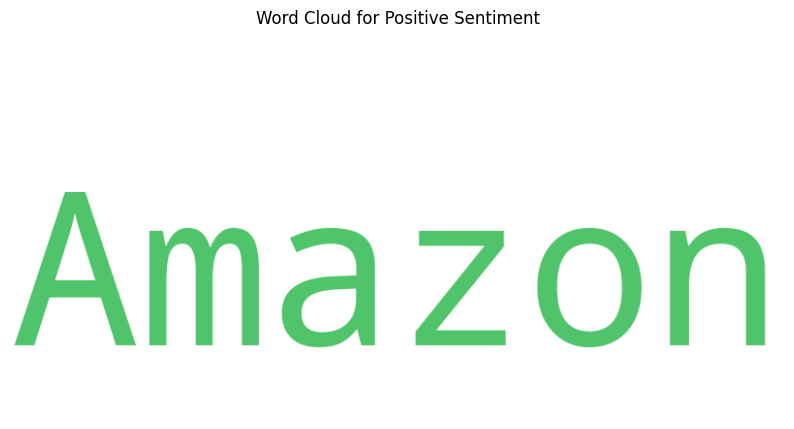

In [34]:
# Create Word Cloud for positive sentiment
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

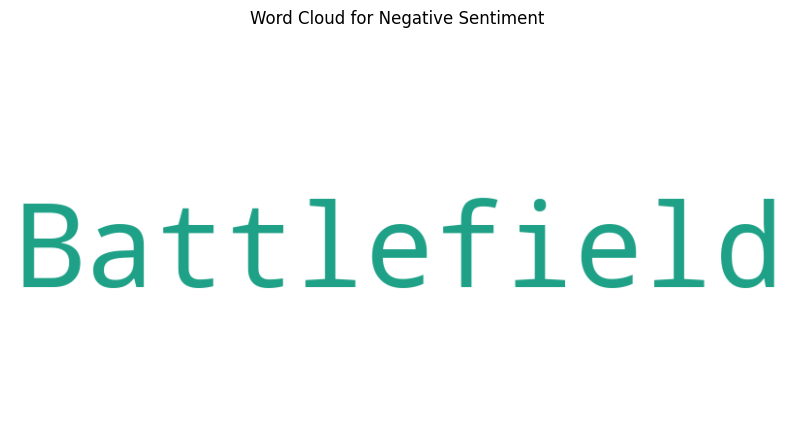

In [35]:
# Create Word Cloud for negative sentiment
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()